# IBM cloud deployment

# Importing the required libraries

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 41 kB/s /s eta 0:00:01B 21.8 MB/s eta 0:00:27
     |████████████████████████████████| 14.1 MB 103.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 105.1 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 122.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 115.8 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 106.8 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting un

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-15 15:55:37.734040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-15 15:55:37.763254: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 15:55:38.341500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-15 15:55:38.341639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

# Load data

In [5]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [6]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

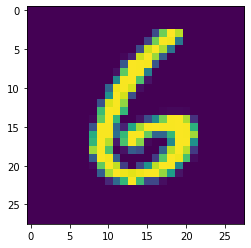

In [8]:
plt.imshow(x_train[6000])     #ploting the index=image

In [9]:
np.argmax(y_train[6000])

0

# Reshaping Dataset

In [10]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [11]:
number_of_classes = 10  #storing the no of classes in a variable

In [12]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [13]:
#create model
model=Sequential ()

2022-11-15 16:02:57.808965: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-15 16:02:57.809001: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [15]:
#flatten the dimension of the image
model.add(Flatten())

In [16]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [17]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [18]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [19]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 97s 51ms/step - loss: 0.2346 - accuracy: 0.9495 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 2/5
1875/1875 [==============================] - 97s 51ms/step - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.1148 - val_accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0959 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.1273 - val_accuracy: 0.9650
Epoch 5/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.1192 - val_accuracy: 0.9729


# Observing the metrics

In [20]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.11922485381364822, 0.9728999733924866]


# Test The Model

In [21]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 75ms/step
[[4.8821677e-16 1.7517336e-14 1.4868889e-15 2.9234821e-09 5.7719251e-07
  3.4064929e-10 9.7158650e-17 4.0406012e-09 1.4532643e-09 9.9999940e-01]]


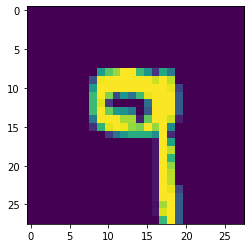

In [22]:
plt.imshow(x_test[6000])

In [23]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [24]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [25]:
# Save the model
model.save('models/mnistCNN.h5')

In [26]:
cd models

/home/wsuser/work/models


In [27]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [28]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 29.0 MB/s eta 0:00:01


# Cloud deploy

In [29]:
!pip install seaborn --upgrade ibm_watson_machine_learning

     |████████████████████████████████| 288 kB 22.5 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [30]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"71Le_nov9WQVw9GK--PMGYLMi2KvQywD9LSahWX8qP3Y"
}
client = APIClient(credentials)
client

In [31]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'space_name',
    'scope': {'bss_account_id': 'b457cc8eaec94427bd9f72af35ea9cfe'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '8b698705-f29e-47e5-a244-dd058c1f6019',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'e89bca3d418349809bafc0e2b9cb52a2',
        'api_key': 'w0eV0ykBpdhzaCyySL7uDcvRsksP-4v-XuCZA8MXodAy',
        'secret_access_key': 'e3180660907a3e1c7548d2ecb62fc0adbdcaec9adb31988f',
        'service_id': 'ServiceId-25004ea9-6a92-41f3-8d21-256c109e93eb'},
       'editor': {'access_key_id': '4f27cd5b495848169dcc4b8237944eeb',
        'api_key': '23n_QbniyjLAeo_Cgoe4wyGCOXzSe6AgiK6eZR6z2I8m',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/b457cc8eaec94427bd9f72af35ea9cfe:4286a648-055b-4b3b-92ee-305a693a2969::',
        'secret_access_key': '994414f40c2a7ec81b5978593c3a759957de60

In [32]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [33]:
space_uid = guid_from_space_name(client,'space_name')
print("Space UID = " + space_uid)

Space UID = 703703e6-8014-4379-82ba-624897295a43


In [34]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [36]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [38]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

model_id = client.repository.get_model_id(model_details)

In [39]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-15T16:15:12.636Z',
  'id': '2edbf6cc-3d97-4d30-bfc4-5dfc9d86625a',
  'modified_at': '2022-11-15T16:15:20.873Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-665002OJ31',
  'resource_key': '91b3a0a9-a970-4fcd-b852-b229010af3d9',
  'space_id': '703703e6-8014-4379-82ba-624897295a43'},
 'system': {'warnings': []}}

In [40]:
model_id = client.repository.get_model_id(model_details)
model_id

'2edbf6cc-3d97-4d30-bfc4-5dfc9d86625a'

In [41]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [42]:
ls

DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


# TEST MODEL

In [43]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [44]:
model = load_model("mnistCNN.h5")

In [45]:
!pip install requests

In [46]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yjP2VLVt24ME4wwMVDfu2uiFheh_0-Wc_qkFBvF-ekHV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwritten-donotdelete-pr-9gbthtdumqzssh'
object_key = '3.png'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [47]:
img = Image.open(streaming_body_5).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [48]:
img

In [49]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [50]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 53ms/step
[[3.1256454e-15 4.3810849e-12 9.0761357e-11 1.0000000e+00 2.4836385e-16
  5.1731276e-13 6.2664460e-14 1.7937016e-16 2.4589820e-12 1.7890447e-12]]


In [51]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]
